In [4]:
import numpy as np
from hmmlearn import hmm
import networkx as nx
import matplotlib.pyplot as plt

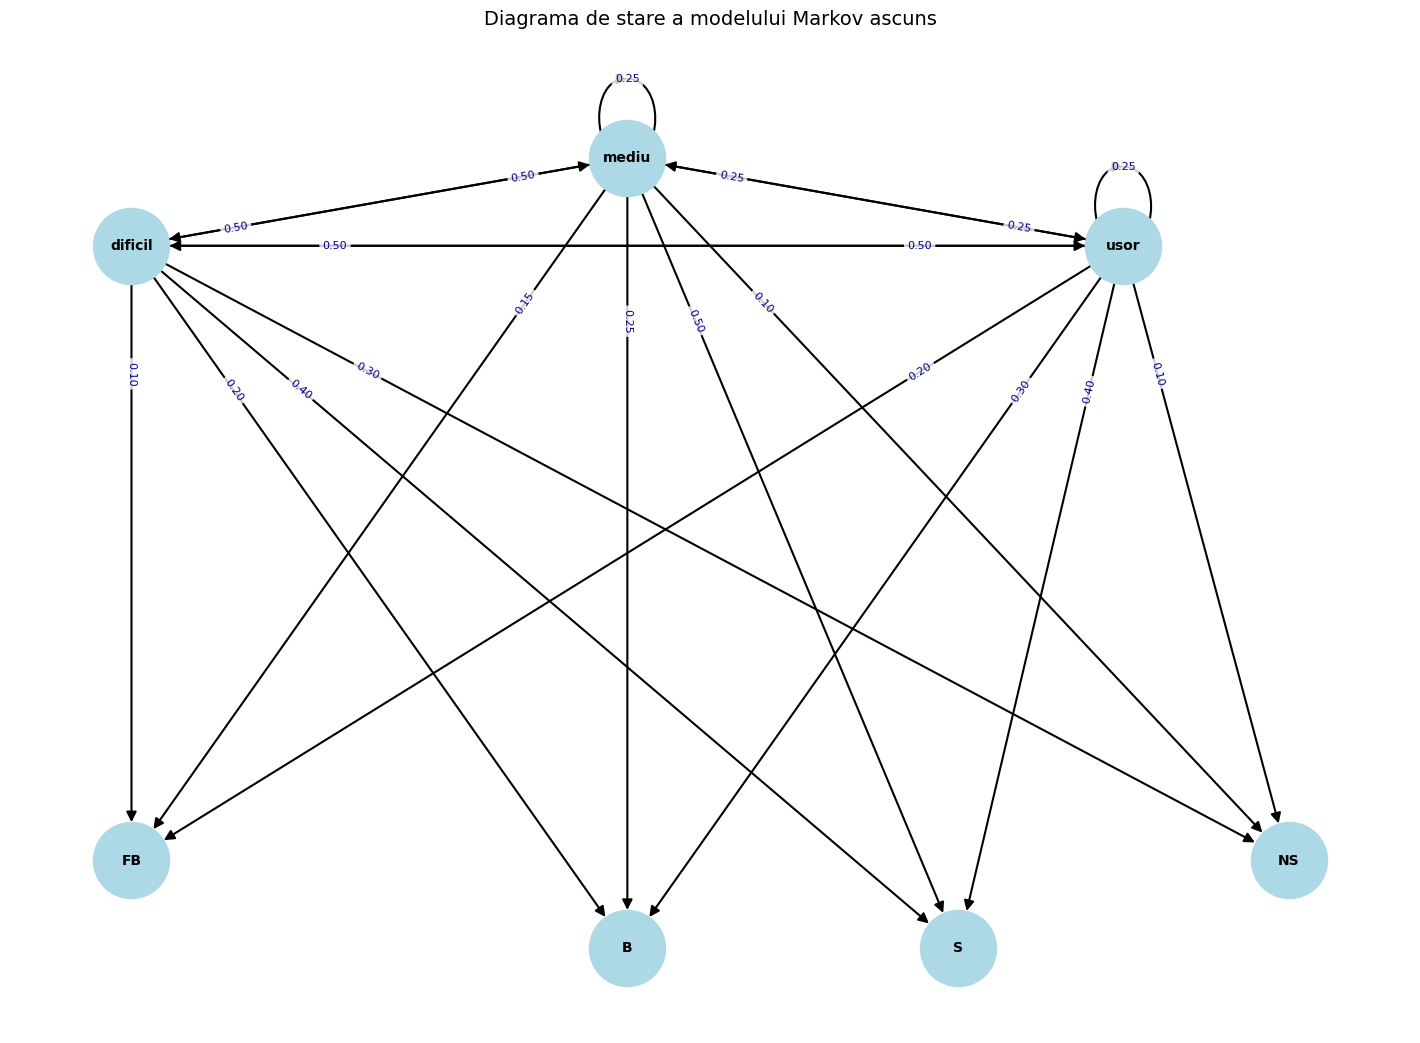

In [5]:
# a)

G = nx.DiGraph()

edges = {
    ("dificil", "mediu"): 0.5,
    ("dificil", "usor"): 0.5,
    ("mediu", "dificil"): 0.5,
    ("mediu", "mediu"): 0.25,
    ("mediu", "usor"): 0.25,
    ("usor", "dificil"): 0.5,
    ("usor", "mediu"): 0.25,
    ("usor", "usor"): 0.25
}

emission_edges = {
    ("dificil", "FB"): 0.1,
    ("dificil", "B"): 0.2,
    ("dificil", "S"): 0.4,
    ("dificil", "NS"): 0.3,
    ("mediu", "FB"): 0.15,
    ("mediu", "B"): 0.25,
    ("mediu", "S"): 0.5,
    ("mediu", "NS"): 0.1,
    ("usor", "FB"): 0.2,
    ("usor", "B"): 0.3,
    ("usor", "S"): 0.4,
    ("usor", "NS"): 0.1
}

pos = {
    "dificil": [-1, 1.5],
    "mediu": [2, 2],
    "usor": [5, 1.5],
    "FB": [-1, -2],
    "B": [2, -2.5],
    "S": [4, -2.5],
    "NS": [6, -2]
}

for (src, dst), prob in edges.items():
    G.add_edge(src, dst, weight=prob, label=f"{prob:.2f}")

for (src, obs), prob in emission_edges.items():
    G.add_edge(src, obs, weight=prob, label=f"{prob:.2f}")

plt.figure(figsize=(14, 10))
nx.draw(
    G, pos, with_labels=True, node_size=3000, node_color="lightblue",
    font_size=10, font_weight="bold", arrowsize=15, width=1.5
)

edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(
    G, pos, edge_labels=edge_labels, font_size=8, font_color="darkblue", label_pos=0.2,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="none", facecolor="white", alpha=0.8)
)

plt.title("Diagrama de stare a modelului Markov ascuns", fontsize=14)
plt.show()

In [6]:
# b)
states = ["dificil", "mediu", "usor"]
n_states = len(states)

observations = ["FB", "B", "S", "NS"]
n_observations = len(observations)

state_prob = np.array([1/3, 1/3, 1/3])

transition_prob = np.array([
    [0.0, 0.5, 0.5],
    [0.5, 0.25, 0.25],
    [0.5, 0.25, 0.25]
])

emission_prob = np.array([
    [0.1, 0.2, 0.4, 0.3],
    [0.15, 0.25, 0.5, 0.1],
    [0.2, 0.3, 0.4, 0.1]
])

model = hmm.CategoricalHMM(n_components=n_states, n_iter=100)
model.startprob_ = state_prob
model.transmat_ = transition_prob
model.emissionprob_ = emission_prob

observed_sequence = [0, 0, 2, 1, 1, 2, 1, 1, 3, 1, 1, 2]  # FB=0, B=1, S=2, NS=3
observed_sequence = np.array(observed_sequence).reshape(-1, 1)

logprob, hidden_states = model.decode(observed_sequence, algorithm="viterbi")

print("Secventa cea mai probabila de dificultati:", [states[state] for state in hidden_states])
print("Probabilitatea secventei:", np.exp(logprob))

Secventa cea mai probabila de dificultati: ['usor', 'usor', 'dificil', 'usor', 'dificil', 'mediu', 'dificil', 'usor', 'dificil', 'usor', 'dificil', 'mediu']
Probabilitatea secventei: 2.109375000000024e-11
